## Call needed Libraries

In [28]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
import numpy as np



## Read Delimited file from Milestone 2 - Milestone 4

In [2]:
df_m2_business=pd.read_csv('bus_rest_merge_m2.txt', sep='|')

In [3]:
df_m3_chain=pd.read_csv('df_chain_m3.txt', sep='|')

In [4]:
df_m4_uscities_dem=pd.read_csv('df_us_cities_dem_m4.txt', sep='|')


## Create Table for each Dataset

* YELP_BUSINESS: Milestone 2 File
* WIKI_CHAIN: Milestone 3 Website Dataset
* US_CITIES_DEM: Milestone 4 API


In [257]:
def create_table (connection_obj, sql, table_name):
    connection_obj = sqlite3.connect('yelp_restaurant2.db')
    cursor_obj = connection_obj.cursor()
    cursor_obj.execute("DROP TABLE IF EXISTS "+ table_name)
    cursor_obj.execute(sql)
    print("Table is Ready {}".format(table_name))
    

In [258]:
YELP_BUSINESS = """ CREATE TABLE YELP_BUSINESS (
            business_id                varchar(250),
            bus_name                   varchar(250),
            address                    varchar(250),
            city                       varchar(250),
            state                      varchar(250),
            postal_code                varchar(250),
            latitude                  float,
            longitude                 float,
            stars                     float,
            review_count                int64,
            is_open                     int64,
            attributes                 varchar(250),
            categories                 varchar(250),
            hours                      varchar(250),
            attribute_count             int64,
            RestaurantsPriceRange2     varchar(250),
            PriceCategory              varchar(250),
            checkin_date_list          varchar(250),
            checkin_count               int64
        ); """


In [259]:
create_table (connection_obj, YELP_BUSINESS,"YELP_BUSINESS" )

Table is Ready YELP_BUSINESS


In [290]:
sql = """ CREATE TABLE WIKI_CHAIN (
            chain_name                   varchar(250),
            original_location            varchar(250),
            founded                      float,
            headquarters                 varchar(250),
            parent_company               varchar(250),
            us_loc_num    varchar(250),
            areas_served                 varchar(250),
            notes                        varchar(250),
            resttype                     varchar(250)
        ); """


In [291]:
create_table (connection_obj, sql,"WIKI_CHAIN" )

Table is Ready WIKI_CHAIN


In [273]:
sql = """ CREATE TABLE US_CITIES_DEM (
            datasetid                  varchar(250),
            recordid                   varchar(250),
            record_timestamp           varchar(250),
            male_population            varchar(250),
            city                       varchar(250),
            number_of_veterans          int64,
            median_age                float,
            race                       varchar(250),
            count                       int64,
            female_population         float,
            state_code                 varchar(250),
            foreign_born              float,
            state                      varchar(250),
            total_population            int64,
            average_household_size    float
        ); """


In [274]:
create_table (connection_obj, sql,"US_CITIES_DEM" )

Table is Ready US_CITIES_DEM


## Insert each dataset to the table

In [293]:
connection_obj = sqlite3.connect('yelp_restaurant2.db')
cursor_obj = connection_obj.cursor()


In [269]:
# Insert Dataframe into SQL Server:
for index, row in df_m2_business.iterrows():
    cursor_obj.execute("""INSERT INTO YELP_BUSINESS (
                    business_id,
                    bus_name,
                    address,
                    city,
                    state,
                    postal_code,
                    latitude,
                    longitude,
                    stars,
                    review_count,
                      is_open,attributes,
                      categories,
                      hours,
                      attribute_count
                      ,RestaurantsPriceRange2,
                      PriceCategory,
                      checkin_date_list,
                      checkin_count) values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)""", 
                       (row['business_id'],
                        row['name'],
                        row['address'],
                        row['city'], 
                        row['state'],
                        row['postal_code'], 
                        row['latitude'],
                        row['latitude'],
                        row['stars'],
                        row['review_count'],
                        row['is_open'],                        
                        row['attributes'],
                        row['categories'],
                        row['hours'],
                       row['attribute_count'], 
                        row['RestaurantsPriceRange2'],
                        row['PriceCategory'],
                        row['checkin_date_list'],
                        row['checkin_count']) ) 
    connection_obj.commit()
        

In [283]:
# Insert Dataframe into SQL Server:
for index, row in df_m4_uscities_dem.iterrows():
    cursor_obj.execute("""INSERT INTO US_CITIES_DEM (
                    datasetid,
                    recordid,
                    record_timestamp,
                    male_population,
                    city,
                    number_of_veterans,
                    median_age,
                    race,
                    count,
                    female_population,
                      state_code,
                      foreign_born,
                      state,
                      total_population,
                      average_household_size) values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)""", 
                       (row['datasetid'],
                        row['recordid'],
                        row['record_timestamp'],
                        row['male_population'], 
                        row['city'],
                        row['number_of_veterans'], 
                        row['median_age'],
                        row['race'],
                        row['count'],
                        row['female_population'],
                        row['state_code'],
                        row['foreign_born'],                        
                        row['state'],
                        row['total_population'],
                        row['average_household_size']) ) 
    connection_obj.commit()


In [300]:
# Insert Dataframe into SQL Server:
for index, row in df_m3_chain.iterrows():
    cursor_obj.execute("""INSERT INTO WIKI_CHAIN  (
                    chain_name ,
                    original_location,
                    founded,
                    headquarters,
                    parent_company,
                    us_loc_num,
                    areas_served,
                    notes,
                    resttype) values(?,?,?,?,?,?,?,?,?)""", 
                       (row['Name'],
                        row['Original location'],
                        row['Founded'],
                        row['Headquarters'], 
                        row['Parent company'],
                        row['Number of U.S. locations'],
                        row['Areas served'], 
                        row['Notes'],
                        row['RestType']) ) 
    connection_obj.commit()


In [303]:
def select_count (table_name):
    connection_obj = sqlite3.connect('yelp_restaurant2.db')
    cursor_obj = connection_obj.cursor()
    rows=cursor_obj.execute("SELECT count(*) as count FROM "+ table_name)
    for count in rows:
        print("{} table Count: {} ".format (table_name,count))    

In [308]:
select_count('YELP_BUSINESS')

YELP_BUSINESS table Count: (54114,) 


In [310]:
select_count('WIKI_CHAIN')

WIKI_CHAIN table Count: (298,) 


In [313]:
select_count('US_CITIES_DEM')

US_CITIES_DEM table Count: (5782,) 


##  Join the datasets together in Python into 1 dataset.

In [5]:
data =[]
with sqlite3.connect("yelp_restaurant2.db") as conn:
    cursor = conn.cursor()
    sql = """
        select * from YELP_BUSINESS a 	left join US_CITIES_DEM b on a.state =b.state_code and a.city=b.city
								left join WIKI_CHAIN c on upper(a.bus_name) = upper(c.chain_name)
    """
    rows = cursor.execute(sql)
    for row in rows:
        data.append(row)


In [6]:
column_names=["business_id","bus_name","address","city","state","postal_code","latitude","longitude","stars","review_count","is_open","attributes","categories","hours","attribute_count","RestaurantsPriceRange2","PriceCategory","checkin_date_list","checkin_count","datasetid","recordid","record_timestamp","male_population","city","number_of_veterans","median_age","race","count","female_population","state_code","foreign_born","state","total_population","average_household_size","chain_name","original_location","founded","headquarters","parent_company","us_loc_num","areas_served","notes","resttype"]

In [7]:
YELP_MERGE_DB = pd.DataFrame(data, columns=column_names)

In [8]:
YELP_MERGE_DB.shape

(322934, 43)

In [9]:
YELP_MERGE_DB.head()

,business_id,bus_name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,average_household_size,chain_name,original_location,founded,headquarters,parent_company,us_loc_num,areas_served,notes,resttype
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,39.955505,4.0,80,...,2.61,None,None,NaN,None,None,None,None,None,None
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,39.955505,4.0,80,...,2.61,None,None,NaN,None,None,None,None,None,None
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,39.955505,4.0,80,...,2.61,None,None,NaN,None,None,None,None,None,None
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,39.955505,4.0,80,...,2.61,None,None,NaN,None,None,None,None,None,None
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,39.955505,4.0,80,...,2.61,None,None,NaN,None,None,None,None,None,None


## Visualization

In [27]:
#     // integer, 0 or 1 for closed or open, respectively

df_m2_business_open=df_m2_business[df_m2_business.is_open==1]
df_m2_business_close=df_m2_business[df_m2_business.is_open==0]


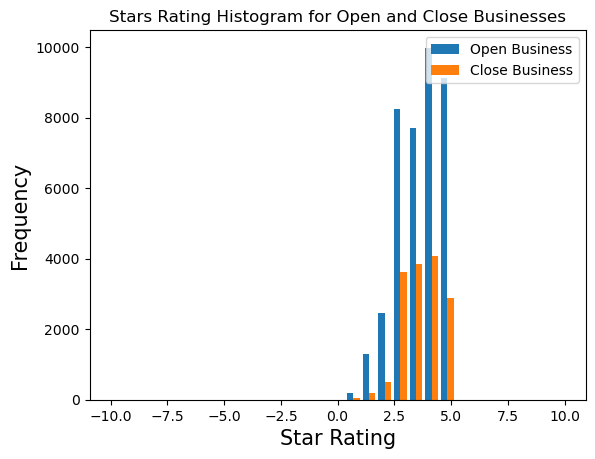

In [47]:
plt.hist([df_m2_business_open['stars'], df_m2_business_close['stars']], bins, label=['Open Business', 'Close Business'])
plt.legend(loc='upper right')
plt.title("Stars Rating Histogram for Open and Close Businesses")
plt.xlabel("Star Rating", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()



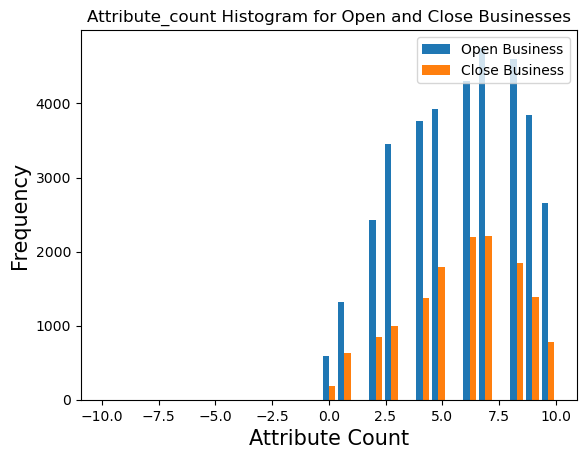

In [38]:
plt.hist([df_m2_business_open['attribute_count'], df_m2_business_close['attribute_count']], bins, label=['Open Business', 'Close Business'])
plt.legend(loc='upper right')
plt.title("Attribute_count Histogram for Open and Close Businesses")
plt.xlabel("Attribute Count", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlim=[0, 15]
plt.ylim=[0, 15]
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

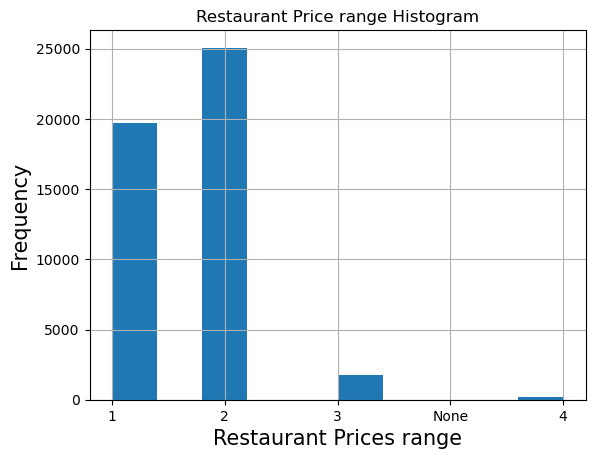

In [56]:
df_m2_business['RestaurantsPriceRange2'].hist()
plt.grid(True)
plt.title("Restaurant Price range Histogram")
plt.xlabel("Restaurant Prices range", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

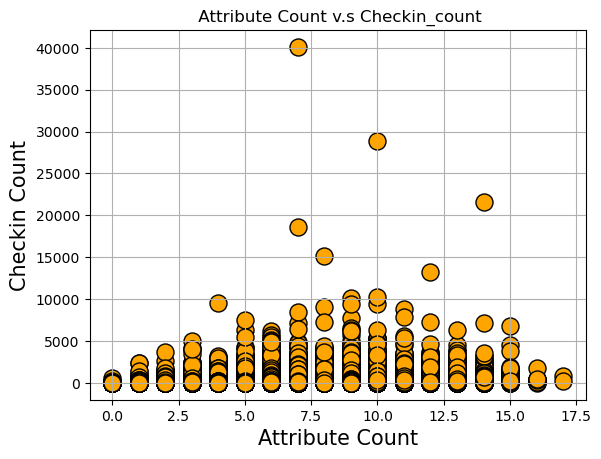

In [58]:
df_m2_business.plot.scatter('attribute_count', 'checkin_count', s=150, c='orange', edgecolor='k')
plt.grid(True)
plt.title(" Attribute Count v.s Checkin_count")
plt.xlabel("Attribute Count", fontsize=15)
plt.ylabel("Checkin Count", fontsize=15)
plt.show

In [95]:
#Chain

YELP_MERGE_CHAIN_OPEN=YELP_MERGE_DB[(YELP_MERGE_DB['is_open']==1 ) & ( ~YELP_MERGE_DB['chain_name'].isnull())]
YELP_MERGE_CHAIN_CLOSE=YELP_MERGE_DB[(YELP_MERGE_DB['is_open']==0 ) & ( ~YELP_MERGE_DB['chain_name'].isnull())]

#f[df['str_field'].str.len() > 0

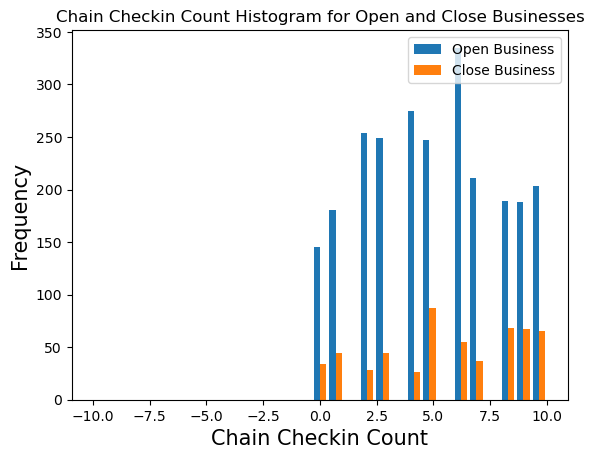

In [97]:
plt.hist([YELP_MERGE_CHAIN_OPEN['checkin_count'], YELP_MERGE_CHAIN_CLOSE['checkin_count']], bins, label=['Open Business', 'Close Business'])
plt.legend(loc='upper right')
plt.title("Chain Checkin Count Histogram for Open and Close Businesses")
plt.xlabel("Chain Checkin Count", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()



In [ ]:

Demographics

Open and Close 


In [96]:
YELP_MERGE_CHAIN_OPEN.columns

Index(['business_id', 'bus_name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'attribute_count',
       'RestaurantsPriceRange2', 'PriceCategory', 'checkin_date_list',
       'checkin_count', 'datasetid', 'recordid', 'record_timestamp',
       'male_population', 'city', 'number_of_veterans', 'median_age', 'race',
       'count', 'female_population', 'state_code', 'foreign_born', 'state',
       'total_population', 'average_household_size', 'chain_name',
       'original_location', 'founded', 'headquarters', 'parent_company',
       'us_loc_num', 'areas_served', 'notes', 'resttype'],
      dtype='object')